# Tutorial 11

**CS3481 Fundamentals of Data Science**

*Semester B 2019/20*
___
**Instructions:**
- same as [Tutorial 1](http://bit.ly/CS3481T1).
___

## Exercise 1 (submit via [uReply](https://cityu.ed2.mobi/student/mobile_index.php) section number **LM1202**)

  For this question, you will continue to use WEKA to cluster the iris2D dataset.

(a) Apply the elbow method to find the optimal number $k$ of clusters.

___
**Answer:**


In [0]:
# modify the code below to record WSS as a function of k
k_list = [1, 2, 3, 4]
WSS_list = [ 0, 0, 0, 0]

In [0]:
# plot WSS as a function of k
import matplotlib.pyplot as plt
plt.plot(k_list,WSS_list,'bo-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.show()

The optimal $k$ is _____.
___

(b) Follow the procedures below to cluster the `iris.2D` dataset.
1. In the `cluster panel`, Select HierarchicalClusterer as the `clusterer`.
1. Choose the number of clusters to be $3$.
1. Select `classes to clusters evaluations` as the test option.
1. Run the clustering algorithm. 

What is the percentage of incorrectly clustered instances? Visualize the cluster assignments and  explain why the performance is better/worse than that of the $k$-means algorithm.

___
**Answer:**
___

(c)  Repeat the hierarchical clustering procedure but with the complete linkage algorithm by setting the `linkType` to `COMPLETE`. Is the result better now? Why?



___
**Answer:**
___

## Exercise 2 (no submission required)

For this question, you will cluster the following dataset by hand calculation.

|  |$Z_1$|$Z_2$|
|--|-----|-----|
|1.|-1   |1    |
|2.|-1   |0    |
|3.|0    |0    |
|4.|1    |0    |
|5.|2    |0    |
|6.|2    |1    |

### (a) 
Apply the folllowing agglomerative clustering algorithms to generate all possible dendrograms. Explain whether the algorithm is able to find non-trivial clusters.

(i) Single linkage method.

___
**Answer:**


You may use the following code to plot a dendrogram. (See [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram).)

In [0]:
import numpy as np
labels = [1,2,3,4,5,6]
n = len(labels)
# modify the linkage matrix
Z_single = np.array([[0,1,1,0],[2,3,1,0],[4,5,1,0],[6,7,2,0],[8,9,3,0]]).astype('float')

{'color_list': ['g', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.0, 2.0, 2.0, 1.0],
  [1.0, 3.0, 3.0, 2.0]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0]],
 'ivl': [5, 6, 1, 2, 3, 4],
 'leaves': [4, 5, 0, 1, 2, 3]}

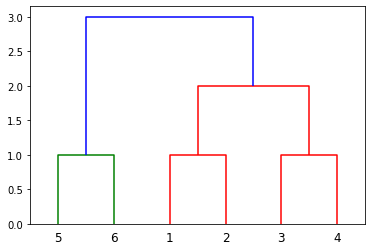

In [0]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(Z_single,labels=labels)

___

(ii) Complete linkage method.

___
**Answer:**


In [0]:
# modify the linkage matrix
Z_complete = np.array([[0,1,1,0],[2,3,1,0],[4,5,1,0],[6,7,2,0],[8,9,3,0]]).astype('float')
dendrogram(Z_complete,labels=labels)

___

## (b)
Follow the steps below to use the elbow method in conjunction with the centroid-based method to compute the clustering solution.

(i) Give the optimal solutions for $k=1$ to $6$ respectively. In particular, calculate the WSS in each case.

___
**Answer:**

In [0]:
# modify the code below to record WSS as a function of k
k_list = [1, 2, 3, 4, 5, 6]
WSS_list = [ 0, 0, 0, 0, 0, 0]

___

(ii) Plot the graph of WSS and find the best number $k$ of clusters using the elbow method.


___
**Answer:**

In [0]:
# plot WSS as a function of k
plt.plot(k_list,WSS_list,'bo-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.show()

___

(iii) Explain whether min-max normalization affects the optimal choice of $k$.

___
**Answer:**
___

## Exercise 3 (Optional)

Similar to the previous tutorial, we will generate the `iris.2D` dataset and normalize the attributes.

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,[0,2]]
Y = iris['target']

X.shape, Y.shape # show the dimensions of the input features and target

((150, 2), (150,))

Apply min-max normalization to the input attributes.

In [0]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
minmax_norm = MinMaxScaler()
X_ = minmax_norm.fit_transform(X)
np.min(X_,axis=0), np.max(X_,axis=0)

(array([0., 0.]), array([1., 1.]))

We will use the elbow method to determine the best choice of $k$.

In [0]:
from sklearn.cluster import KMeans
maxk = 5
k_list = range(1,maxk+1)
kmeans_list = [[]] * maxk
WSS_list = [0] * maxk
for k in k_list:
  kmeans_list[k-1] = KMeans(n_clusters=k).fit(X_)
  WSS_list[k-1] = kmeans_list[k-1].inertia_ # WSS is also called inertia

Plot the WSS as a function $k$.

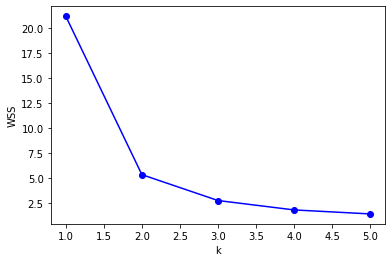

In [0]:
import matplotlib.pyplot as plt

plt.plot(k_list,WSS_list,'bo-')
plt.ylabel('WSS')
plt.xlabel('k')
plt.show()

Plot the clustering solutions for $k=2$ and $3$ respectively.

Text(0.5, 1.0, 'k=3')

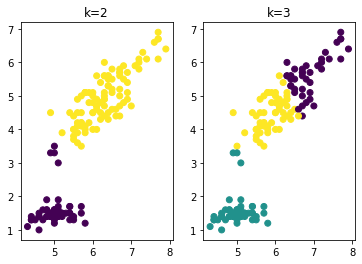

In [0]:
plt.figure()
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=kmeans_list[1].labels_)
plt.title("k=2")
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=kmeans_list[2].labels_)
plt.title("k=3")

**Exercise** Based on the elbow method, what is the optimal choice of $k$? Does the elbow method work?

**Exercise** Generate a dendrogram of the iris2D dataset by following the documentation [plot agglomerative dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) and [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram).